In [1]:
### Originally written by Norbert Wex
from math import pi, sin, cos, sqrt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Roemer(e, om, order):
    e1 = e*sin(om)
    e2 = e*cos(om)
    x  = []
    yF = []
    yZ = []

    sw = sin(om)
    cw = cos(om)

    ii = 0
    while ii < 1000:

        # mean anomaly
        ma = 2*pi*(ii/1000.0) 

        # eccentric anomaly - solve Kepler's equation (cf. TEMPO)
        u  = ma + e*sin(ma)*(1 + e*cos(ma))
        du = 1
        while abs(du) > 1.0e-14:
            onemecu = 1 - e*cos(u)
            du = (ma - (u - e*sin(u))) / onemecu
            u  = u + du

        # Roemer delay / x
        alpha = sw
        beta  = sqrt(1 - e**2)*cw
        Rx    = alpha*(cos(u) - e) + beta*sin(u)

        #--- approximations ---

        phi = ma + om

        #Lange et al.
        RxL = sin(phi) + ( e2*sin(2*phi) - e1*cos(2*phi) ) / 2

        #Zhu et al.

        RxZ = RxL - ( 5*e2**2*sin(phi) - 3*e2**2*sin(3*phi) - 2*e1*e2*cos(phi) + 6*e1*e2*cos(3*phi) + 3*e1**2*sin(phi) + 3*e1**2*sin(3*phi) ) / 8

        #Third-Order Expression

        RxF = RxZ - ( 3*e1**2*e2*sin(2*phi) + 5*e2**3*sin(2*phi) - 4*e1**3*cos(2*phi) - 6*e1*e2**2*cos(2*phi) - 4*e2**3*sin(4*phi) + 12*e1**2*e2*sin(4*phi) + 12*e1*e2**2*cos(4*phi) - 4*e1**3*cos(4*phi) ) / 12

        #--- diff (modulo constant offset) ---

        constOffsetT = -1.5*e1
        deltaF = RxF - (Rx - constOffsetT)
        deltaZ = RxZ - (Rx - constOffsetT)

        x.append(ma)
        yF.append(deltaF)
        yZ.append(deltaZ)

        ii += 1
    if order == "second":
        return x, yZ
    elif order == "third":
        return x, yF
    else:
        print("Order must be 'second' or 'third'")

<Figure size 720x432 with 0 Axes>

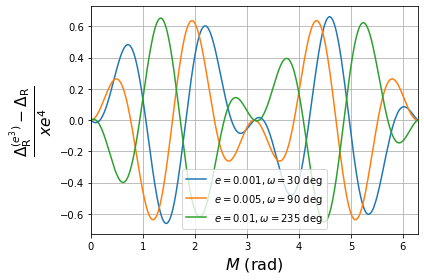

In [7]:
plt.figure(figsize=(10,6))
plt.figure(facecolor='white')

plt.xlabel('$M$ (rad)', fontsize=16)
plt.ylabel('$\\frac{\Delta_\mathrm{R}^{(e^3)} - \Delta_\mathrm{R}}{x e^4}$', fontsize=22)

plt.xlim(0,2*pi)
plt.grid(True)

es  =  [0.001, 0.005, 0.01]                                             
oms =  (pi/180)*np.array([30, 90, 235])

for e, om in zip(es,oms):
    xs, ys = Roemer(e, om, 'third')
    plt.plot(xs, [y*e**-4 for y in ys], '-', label=f'$e = {e}, \omega = {om*180/pi:.0f}$'+'$~\mathrm{deg}$')

plt.legend()
plt.tight_layout()
plt.savefig("ell1test.png",format="png",dpi=300,bbox_inches='tight')
plt.show()